# Exploratory Data Analysis (EDA)

## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set(style="whitegrid")

## 2. Load Datasets

In [3]:
# Define file paths (adjust if necessary based on notebook location relative to data)
DATA_PATH = '../data/raw/' # Assuming notebook is in 'notebooks' directory

dataset_file = os.path.join(DATA_PATH, 'dataset.csv')
description_file = os.path.join(DATA_PATH, 'symptom_Description.csv')
precaution_file = os.path.join(DATA_PATH, 'symptom_precaution.csv')
severity_file = os.path.join(DATA_PATH, 'Symptom-severity.csv')

# Load the datasets
try:
    df_dataset = pd.read_csv(dataset_file)
    df_description = pd.read_csv(description_file)
    df_precaution = pd.read_csv(precaution_file)
    df_severity = pd.read_csv(severity_file)
    print("Datasets loaded successfully!")
except FileNotFoundError as e:
    print(f"Error loading datasets: {e}")
    print(f"Please ensure the files exist at the specified paths relative to the notebook.")
    # Handle error appropriately, maybe stop execution or use placeholder data
    df_dataset, df_description, df_precaution, df_severity = [pd.DataFrame()]*4

Datasets loaded successfully!


## 3. EDA on `dataset.csv`

This dataset contains the primary symptom information linked to diseases.

In [4]:
print("--- Dataset: dataset.csv ---")
if not df_dataset.empty:
    print("\nShape:", df_dataset.shape)
    print("\nFirst 5 rows:\n", df_dataset.head())
    print("\nInfo:")
    df_dataset.info()
    print("\nMissing values:\n", df_dataset.isnull().sum())
    print("\nDuplicate rows:", df_dataset.duplicated().sum())
    # Clean column names (remove leading/trailing spaces)
    df_dataset.columns = df_dataset.columns.str.strip()
    # Check unique diseases
    print("\nUnique diseases:", df_dataset['Disease'].nunique())
    print("\nDisease value counts:\n", df_dataset['Disease'].value_counts())

--- Dataset: dataset.csv ---

Shape: (4920, 18)

First 5 rows:
             Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN 

#### 3.1 Visualize Disease Distribution

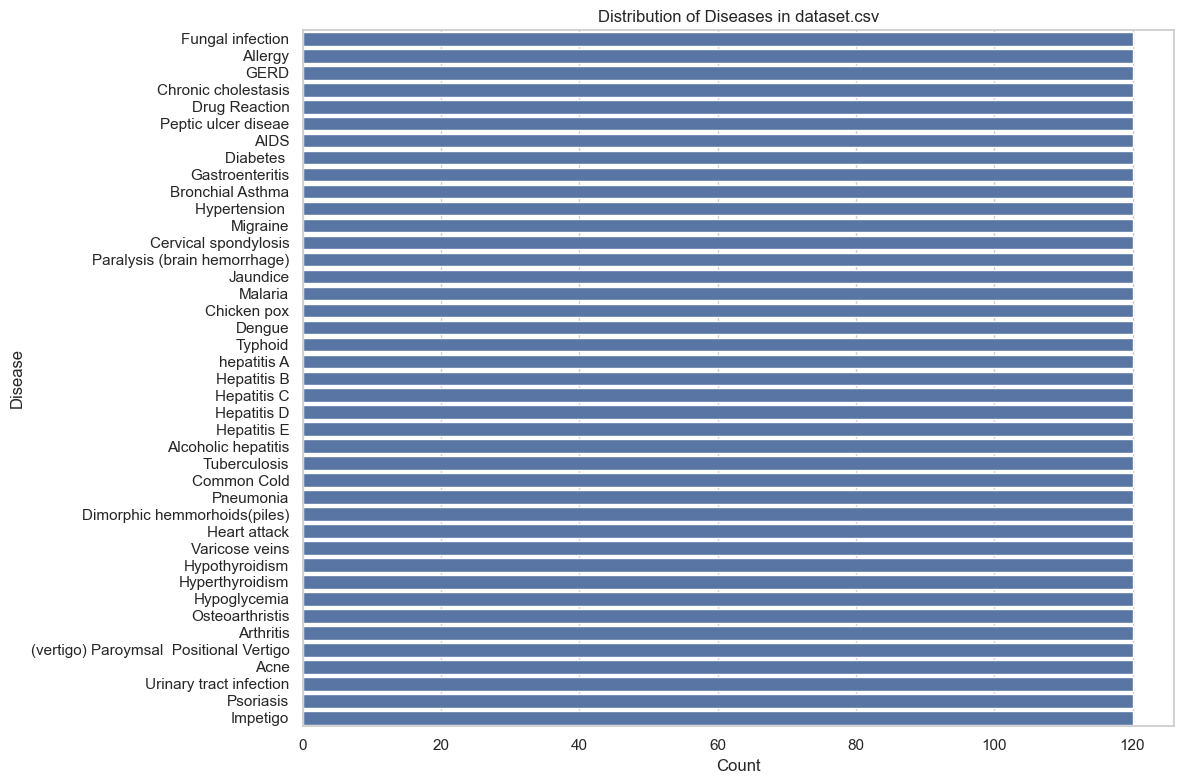

In [5]:
if not df_dataset.empty:
    plt.figure(figsize=(12, 8))
    sns.countplot(y='Disease', data=df_dataset, order = df_dataset['Disease'].value_counts().index)
    plt.title('Distribution of Diseases in dataset.csv')
    plt.xlabel('Count')
    plt.ylabel('Disease')
    plt.tight_layout()
    plt.show()

#### 3.2 Symptom Analysis

In [6]:
# Identify symptom columns (assuming they are named Symptom_1, Symptom_2, etc.)
if not df_dataset.empty:
    symptom_cols = [col for col in df_dataset.columns if 'Symptom' in col]
    print(f"\nFound {len(symptom_cols)} symptom columns.")
    
    # Melt the dataframe to get a long format of symptoms
    df_symptoms_long = df_dataset.melt(id_vars=['Disease'], value_vars=symptom_cols, var_name='Symptom_N', value_name='Symptom')
    df_symptoms_long = df_symptoms_long.dropna(subset=['Symptom'])
    df_symptoms_long['Symptom'] = df_symptoms_long['Symptom'].str.strip() # Clean symptom names
    
    print("\nTop 20 most common symptoms:")
    print(df_symptoms_long['Symptom'].value_counts().head(20))


Found 17 symptom columns.

Top 20 most common symptoms:
Symptom
fatigue              1932
vomiting             1914
high_fever           1362
loss_of_appetite     1152
nausea               1146
headache             1134
abdominal_pain       1032
yellowish_skin        912
yellowing_of_eyes     816
chills                798
skin_rash             786
malaise               702
chest_pain            696
joint_pain            684
itching               678
sweating              678
dark_urine            570
diarrhoea             564
cough                 564
irritability          474
Name: count, dtype: int64


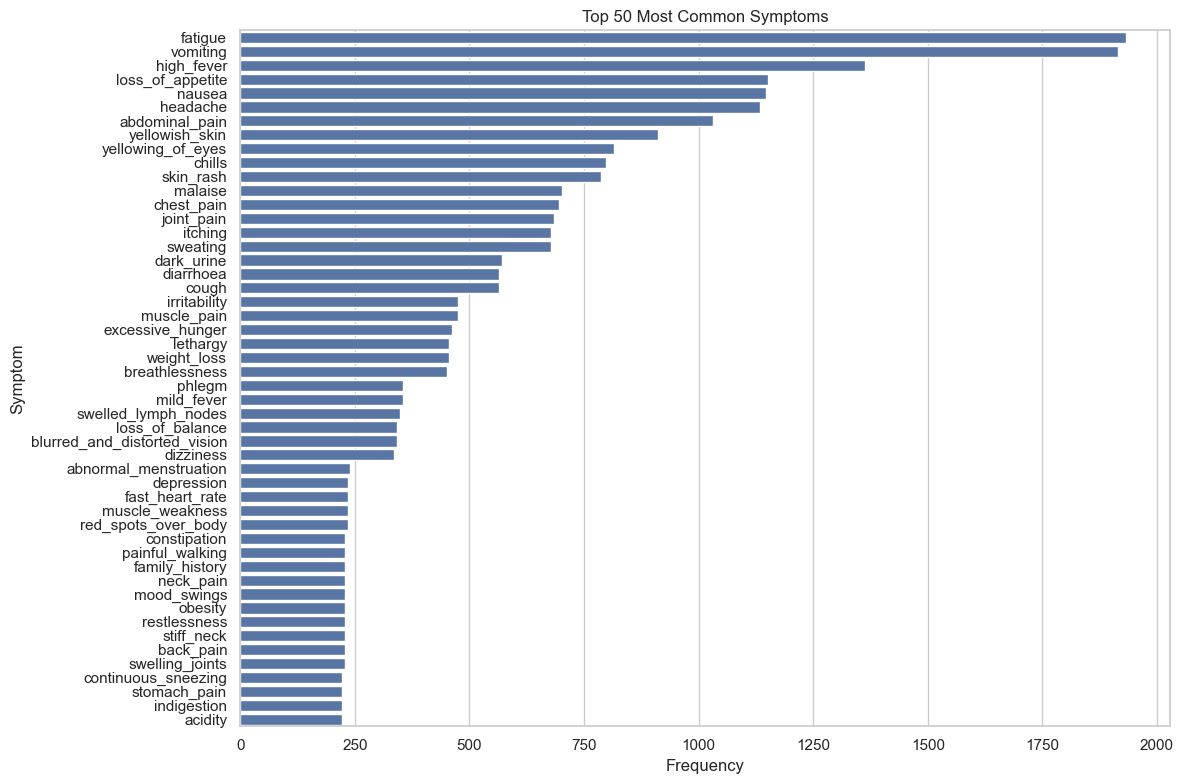

In [7]:
# Visualize top N symptoms
if not df_dataset.empty:
    plt.figure(figsize=(12, 8))
    top_n = 50
    symptom_counts = df_symptoms_long['Symptom'].value_counts().head(top_n)
    sns.barplot(x=symptom_counts.values, y=symptom_counts.index)
    plt.title(f'Top {top_n} Most Common Symptoms')
    plt.xlabel('Frequency')
    plt.ylabel('Symptom')
    plt.tight_layout()
    plt.show()

## 4. EDA on `symptom_Description.csv`

This dataset provides descriptions for diseases.

In [7]:
print("\n--- Dataset: symptom_Description.csv ---")
if not df_description.empty:
    print("\nShape:", df_description.shape)
    print("\nFirst 5 rows:\n", df_description.head())
    print("\nInfo:")
    df_description.info()
    print("\nMissing values:\n", df_description.isnull().sum())
    print("\nDuplicate rows:", df_description.duplicated().sum())
    # Check unique diseases
    print("\nUnique diseases:", df_description['Disease'].nunique())
    # Example Description
    if 'Disease' in df_description.columns and 'Description' in df_description.columns:
      print("\nExample Description (Fungal infection):\n", df_description[df_description['Disease'] == 'Fungal infection']['Description'].values)


--- Dataset: symptom_Description.csv ---

Shape: (41, 2)

First 5 rows:
           Disease                                        Description
0   Drug Reaction  An adverse drug reaction (ADR) is an injury ca...
1         Malaria  An infectious disease caused by protozoan para...
2         Allergy  An allergy is an immune system response to a f...
3  Hypothyroidism  Hypothyroidism, also called underactive thyroi...
4       Psoriasis  Psoriasis is a common skin disorder that forms...

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Disease      41 non-null     object
 1   Description  41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes

Missing values:
 Disease        0
Description    0
dtype: int64

Duplicate rows: 0

Unique diseases: 41

Example Description (Fungal infection):
 ['In humans, fungal infections occur when an in

## 5. EDA on `symptom_precaution.csv`

This dataset lists precautions for each disease.

In [8]:
print("\n--- Dataset: symptom_precaution.csv ---")
if not df_precaution.empty:
    print("\nShape:", df_precaution.shape)
    print("\nFirst 5 rows:\n", df_precaution.head())
    print("\nInfo:")
    df_precaution.info()
    print("\nMissing values:\n", df_precaution.isnull().sum()) # Check for NaNs
    print("\nDuplicate rows:", df_precaution.duplicated().sum())
    # Check unique diseases
    print("\nUnique diseases:", df_precaution['Disease'].nunique())
    
    # Identify precaution columns
    precaution_cols = [col for col in df_precaution.columns if 'Precaution' in col]
    print(f"\nFound {len(precaution_cols)} precaution columns.")
    
    # Melt to long format
    df_precautions_long = df_precaution.melt(id_vars=['Disease'], value_vars=precaution_cols, var_name='Precaution_N', value_name='Precaution')
    df_precautions_long = df_precautions_long.dropna(subset=['Precaution'])
    df_precautions_long['Precaution'] = df_precautions_long['Precaution'].str.strip()
    
    print("\nTop 10 most common precautions:")
    print(df_precautions_long['Precaution'].value_counts().head(10))


--- Dataset: symptom_precaution.csv ---

Shape: (41, 5)

First 5 rows:
           Disease                      Precaution_1  \
0   Drug Reaction                   stop irritation   
1         Malaria          Consult nearest hospital   
2         Allergy                    apply calamine   
3  Hypothyroidism                     reduce stress   
4       Psoriasis  wash hands with warm soapy water   

                   Precaution_2        Precaution_3  \
0      consult nearest hospital    stop taking drug   
1               avoid oily food  avoid non veg food   
2       cover area with bandage                 NaN   
3                      exercise         eat healthy   
4  stop bleeding using pressure      consult doctor   

                  Precaution_4  
0                    follow up  
1           keep mosquitos out  
2  use ice to compress itching  
3             get proper sleep  
4                   salt baths  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries

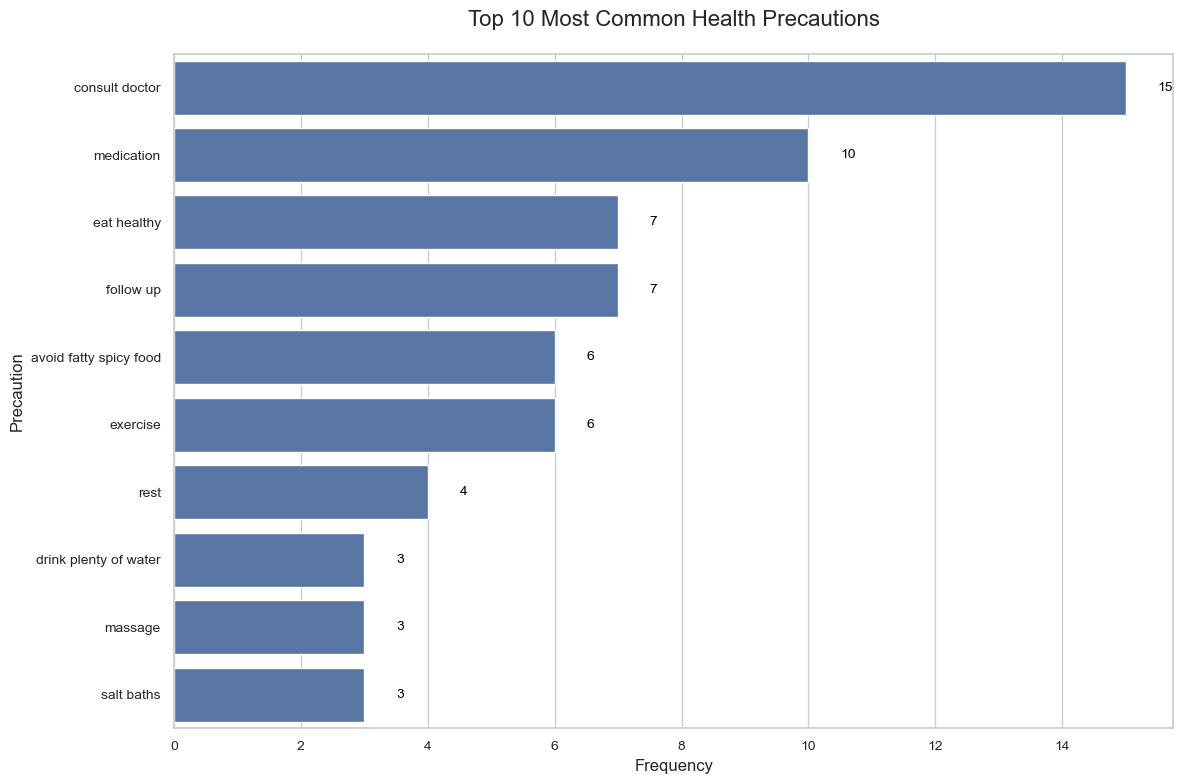

In [12]:
# Prepare the data
precaution_cols = [col for col in df_precaution.columns if 'Precaution' in col]
df_precautions_long = df_precaution.melt(id_vars=['Disease'], value_vars=precaution_cols, 
                                       var_name='Precaution_N', value_name='Precaution')
df_precautions_long = df_precautions_long.dropna(subset=['Precaution'])
df_precautions_long['Precaution'] = df_precautions_long['Precaution'].str.strip()

top_precautions = df_precautions_long['Precaution'].value_counts().head(10)

# Create visualization
plt.figure(figsize=(12, 8))
sns.barplot(x=top_precautions.values, y=top_precautions.index)
plt.title('Top 10 Most Common Health Precautions', fontsize=16, pad=20)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Precaution', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add value labels
for i, v in enumerate(top_precautions.values):
    plt.text(v + 0.5, i, str(v), color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

## 6. EDA on `Symptom-severity.csv`

This dataset provides a severity weight for each symptom.

In [14]:
print("\n--- Dataset: Symptom-severity.csv ---")
if not df_severity.empty:
    print("\nShape:", df_severity.shape)
    print("\nFirst 5 rows:\n", df_severity.head())
    print("\nInfo:")
    df_severity.info()
    print("\nMissing values:\n", df_severity.isnull().sum())
    print("\nDuplicate rows:", df_severity.duplicated().sum())
    # Clean symptom names
    df_severity['Symptom'] = df_severity['Symptom'].str.strip()
    # Check unique symptoms and weights
    print("\nUnique symptoms:", df_severity['Symptom'].nunique())
    print("\nUnique weights:", sorted(df_severity['weight'].unique()))
    print("\nWeight distribution:\n", df_severity['weight'].value_counts())


--- Dataset: Symptom-severity.csv ---

Shape: (133, 2)

First 5 rows:
                 Symptom  weight
0               itching       1
1             skin_rash       3
2  nodal_skin_eruptions       4
3   continuous_sneezing       4
4             shivering       5

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB

Missing values:
 Symptom    0
weight     0
dtype: int64

Duplicate rows: 0

Unique symptoms: 132

Unique weights: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]

Weight distribution:
 weight
4    39
5    35
3    21
6    17
2    15
7     5
1     1
Name: count, dtype: int64


#### 6.1 Visualize Symptom Severity Distribution

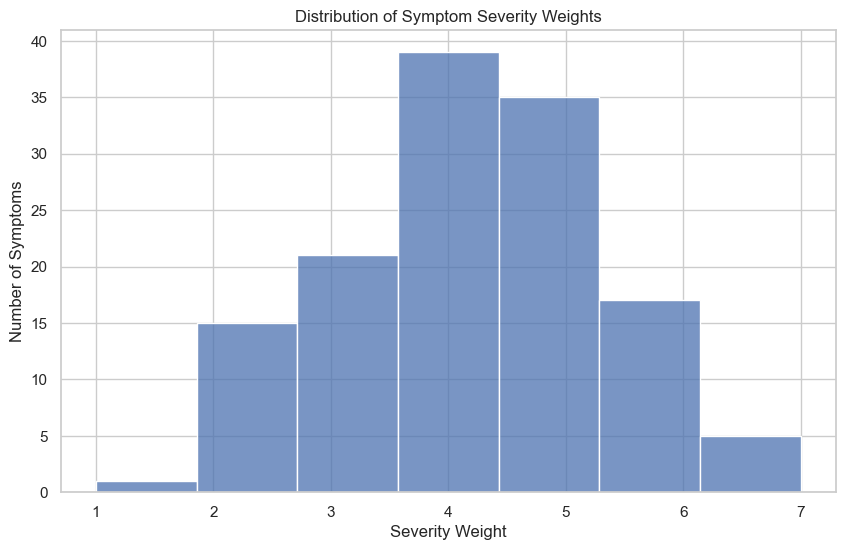

In [15]:
if not df_severity.empty:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_severity['weight'], bins=len(df_severity['weight'].unique()), kde=False)
    plt.title('Distribution of Symptom Severity Weights')
    plt.xlabel('Severity Weight')
    plt.ylabel('Number of Symptoms')
    plt.xticks(sorted(df_severity['weight'].unique()))
    plt.show()

#### 6.2 Symptoms with Highest/Lowest Severity

In [11]:
if not df_severity.empty:
    print("\nSymptoms with highest severity:")
    print(df_severity.sort_values('weight', ascending=False).head())
    
    print("\nSymptoms with lowest severity:")
    print(df_severity.sort_values('weight', ascending=True).head())


Symptoms with highest severity:
                 Symptom  weight
113                 coma       7
46   swelling_of_stomach       7
56            chest_pain       7
57     weakness_in_limbs       7
25            high_fever       7

Symptoms with lowest severity:
               Symptom  weight
0              itching       1
21            lethargy       2
98   altered_sensorium       2
124           scurring       2
96        irritability       2


## 7. Potential Merging/Joining (Example)

We can merge the symptom severity with the main dataset symptoms for further analysis.

In [12]:
if not df_dataset.empty and not df_severity.empty:
    # Use the melted symptom data from section 3.2
    df_merged = pd.merge(df_symptoms_long, df_severity, on='Symptom', how='left')
    
    print("\nMerged Data (Symptoms + Severity) Head:")
    print(df_merged.head())
    
    print("\nMissing weights after merge:", df_merged['weight'].isnull().sum())
    # Check which symptoms didn't have a match in the severity file
    missing_severity_symptoms = df_merged[df_merged['weight'].isnull()]['Symptom'].unique()
    print(f"\nSymptoms in dataset.csv but not in Symptom-severity.csv ({len(missing_severity_symptoms)}):\n", missing_severity_symptoms)


Merged Data (Symptoms + Severity) Head:
            Disease  Symptom_N    Symptom  weight
0  Fungal infection  Symptom_1    itching     1.0
1  Fungal infection  Symptom_1  skin_rash     3.0
2  Fungal infection  Symptom_1    itching     1.0
3  Fungal infection  Symptom_1    itching     1.0
4  Fungal infection  Symptom_1    itching     1.0

Missing weights after merge: 318

Symptoms in dataset.csv but not in Symptom-severity.csv (3):
 ['foul_smell_of urine' 'dischromic _patches' 'spotting_ urination']


## 8. Conclusion

This notebook performed an initial EDA on the four provided datasets. Key findings include:
- The distribution of diseases and symptoms.
- The structure of description and precaution data.
- The distribution of symptom severity weights.
- Identified potential inconsistencies (e.g., symptoms present in `dataset.csv` but missing severity scores).

Further analysis could involve deeper dives into relationships between symptoms, diseases, and severity, and preparing the data for modeling.